In [1]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


from nltk.stem import PorterStemmer 
ps = PorterStemmer() 

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

%matplotlib inline
pd.set_option('display.max_colwidth', 300)

In [2]:
# function for text cleaning

def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower()
    
    temp = []
    
    for word in text.split():
        temp.append(wordnet_lemmatizer.lemmatize(word))
    
    text = ' '.join(temp)
    return text

In [3]:
input_df = pd.read_csv("output.csv")
input_df.describe()

movie_name     genres
count      199280     199280
unique     173598       1270
top        Broken  ['drama']
freq           27      31490

In [4]:
#Get the first five rows of the dataset
input_df.head()

movie_name                            genres
0                      Miss Jerry                       ['romance']
1                          Hamlet                         ['drama']
2  The Fairylogue and Radio-Plays          ['adventure', 'fantasy']
3       Hamlet, Prince of Denmark                         ['drama']
4               The Life of Moses  ['biography', 'drama', 'family']

In [5]:
#Get the total number of genres in the dataset
totalGenres = []
allGenres = []
for row in input_df['genres']:
    if row:
        temp = []
        curstr = row[1:-1]
        curGenres = curstr.split(',')
        for eachGenre in curGenres:
            allGenres.append(eachGenre.strip())
            temp.append(eachGenre.strip())
        totalGenres.append(temp)
input_df['new_genres'] = totalGenres

input_df.head()


movie_name                            genres  \
0                      Miss Jerry                       ['romance']   
1                          Hamlet                         ['drama']   
2  The Fairylogue and Radio-Plays          ['adventure', 'fantasy']   
3       Hamlet, Prince of Denmark                         ['drama']   
4               The Life of Moses  ['biography', 'drama', 'family']   

                         new_genres  
0                       ['romance']  
1                         ['drama']  
2          ['adventure', 'fantasy']  
3                         ['drama']  
4  ['biography', 'drama', 'family']

In [6]:
input_df_new = input_df[~(input_df['new_genres'].str.len() == 0)]
input_df

movie_name  \
0                                   Miss Jerry   
1                                       Hamlet   
2               The Fairylogue and Radio-Plays   
3                    Hamlet, Prince of Denmark   
4                            The Life of Moses   
...                                        ...   
199275                             Liebestraum   
199276  The unknown project title at this time   
199277                                Minotaur   
199278                                   Coven   
199279                       The Copeland Case   

                                  genres                        new_genres  
0                            ['romance']                       ['romance']  
1                              ['drama']                         ['drama']  
2               ['adventure', 'fantasy']          ['adventure', 'fantasy']  
3                              ['drama']                         ['drama']  
4       ['biography', 'drama', 'family']  ['biography', 'drama', 'family']  
...                                  ...                               ...  
199275                       ['musical']                       ['musical']  
199276                        ['comedy']                        ['comedy']  
199277                      ['thriller']                      ['thriller']  
199278    ['drama', 'history', 'horror']    ['drama', 'history', 'horror']  
199279                         ['drama']                         ['drama']  

[199280 rows x 3 columns]

In [7]:
input_df_new.describe()
# print(allGenres)
# len(allGenres)

movie_name     genres new_genres
count      199280     199280     199280
unique     173598       1270       1270
top        Broken  ['drama']  ['drama']
freq           27      31490      31490

In [8]:
allGenres = nltk.FreqDist(allGenres) 

In [9]:
all_genres_df = pd.DataFrame({'Genre': list(allGenres.keys()), 
                              'Count': list(allGenres.values())})

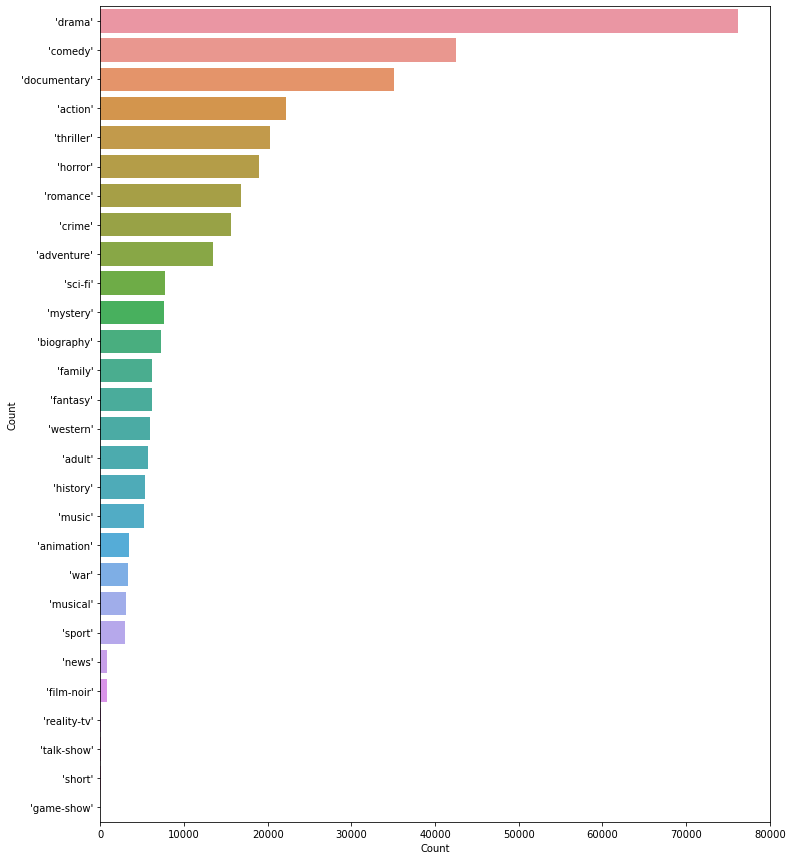

In [10]:
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()

In [11]:
input_df['movie_name_new'] = input_df['movie_name'].apply(lambda x: clean_text(x))

In [12]:
input_df.head()

movie_name                            genres  \
0                      Miss Jerry                       ['romance']   
1                          Hamlet                         ['drama']   
2  The Fairylogue and Radio-Plays          ['adventure', 'fantasy']   
3       Hamlet, Prince of Denmark                         ['drama']   
4               The Life of Moses  ['biography', 'drama', 'family']   

                         new_genres                 movie_name_new  
0                       ['romance']                     miss jerry  
1                         ['drama']                         hamlet  
2          ['adventure', 'fantasy']  the fairylogue and radio play  
3                         ['drama']       hamlet prince of denmark  
4  ['biography', 'drama', 'family']              the life of moses

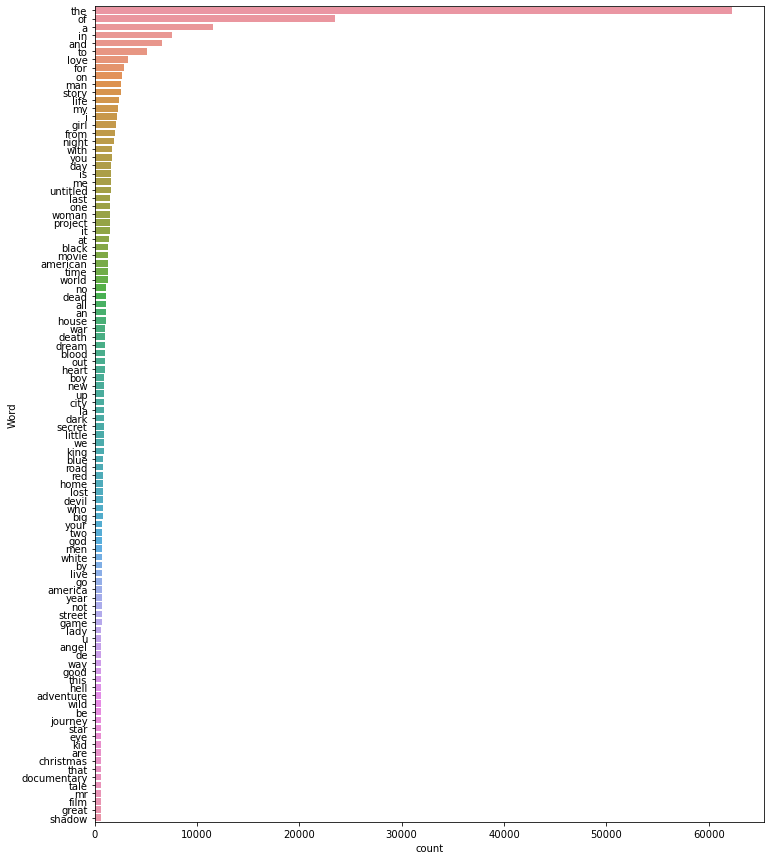

In [13]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freq_words(input_df['movie_name_new'], 100)

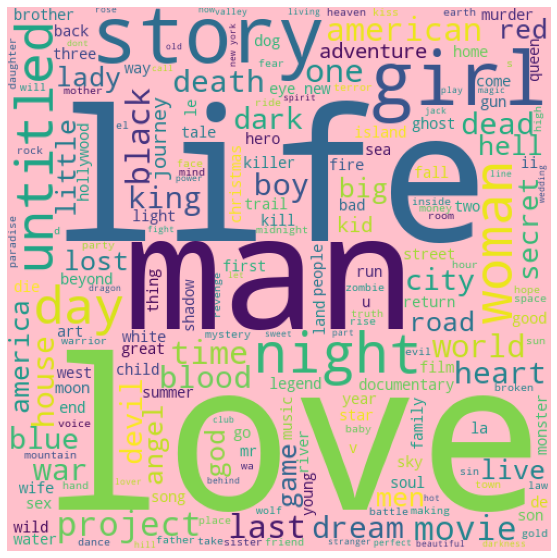

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
all_words = ' '.join([text for text in input_df['movie_name_new']]) 
# all_words = all_words.split() 
def plot_cloud(wordcloud):
    
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud) 
    plt.axis("off");
wordcloud = WordCloud(width = 500, height = 500, background_color='pink', random_state=10).generate(all_words)
plot_cloud(wordcloud)

In [15]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sidharth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

input_df['movie_name_new'] = input_df['movie_name_new'].apply(lambda x: remove_stopwords(x))

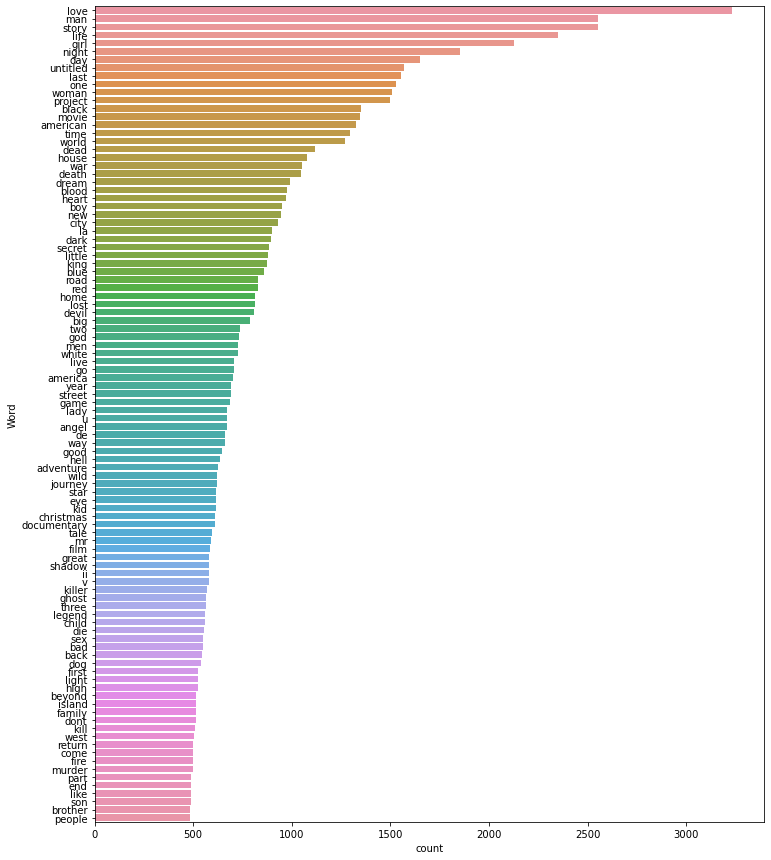

In [17]:
freq_words(input_df['movie_name_new'], 100)

In [18]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(input_df['new_genres'])

# transform target variable
y = multilabel_binarizer.transform(input_df['new_genres'])

In [19]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=100000)


In [20]:
xtrain, xval, ytrain, yval = train_test_split(input_df['movie_name_new'], y, test_size=0.01)


In [21]:
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [22]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

In [23]:
lr = LogisticRegression(max_iter=10000)
clf = OneVsRestClassifier(lr)

In [24]:
clf.fit(xtrain_tfidf, ytrain)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=10000))

In [25]:
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

In [26]:
y_pred[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [27]:
multilabel_binarizer.inverse_transform(y_pred)[1]


()

In [28]:
f1_score(yval, y_pred, average="micro")

0.2077856420626896

In [29]:
y_pred_prob = clf.predict_proba(xval_tfidf)

In [30]:
t = 0.3 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)

In [31]:
f1_score(yval, y_pred_new, average="micro")

0.40425897303795294

In [32]:
def infer_tags(q):
    q = clean_text(q)
    q = remove_stopwords(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = clf.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred)

In [68]:
for i in range(5):
    k = xval.sample(1).index[0]
    print("Movie: ", input_df['movie_name'][k], "\nPredicted genre: ", infer_tags(xval[k])), print("Actual genre: ",input_df['new_genres'][k], "\n")


Movie:  The Alfred Victorian 
Predicted genre:  [()]
Actual genre:  ["'thriller'"] 

Movie:  Wet Asphalt 
Predicted genre:  [()]
Actual genre:  ["'drama'", "'thriller'"] 

Movie:  The Prey 
Predicted genre:  [()]
Actual genre:  ["'crime'", "'thriller'"] 

Movie:  The Big Knife 
Predicted genre:  [("'drama'",)]
Actual genre:  ["'crime'", "'drama'", "'film-noir'"] 

Movie:  Lead with Love: A Documentary Film by Logan Lynn 
Predicted genre:  [("'documentary'",)]
Actual genre:  ["'documentary'"] 



In [71]:
testTitle = clean_text("The Big Knife")
print(clean_text(testTitle))
def findInput(movieTitle):
#     print(movieTitle,movieTitle == testTitle)
    if movieTitle == testTitle:
        print('here')
# xval.where(xval == testTitle)
# print(input_df['movie_name'])
# print(xval.iloc[lambda x: x == testTitle])
print (xval[xval == testTitle].index)

the big knife
Int64Index([], dtype='int64')
